In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


# 问题一：有孤立点的数据逼近（最小二乘）

In [3]:
# 生成数据
np.random.seed(0)
x = np.linspace(0, 10, 7)
y = np.full(7, 5)  # 水平直线 y = 5
outlier = np.array([5, 20])  # 孤立点

# 将数据和孤立点合并
x_combined = np.append(x, outlier[0])
y_combined = np.append(y, outlier[1])

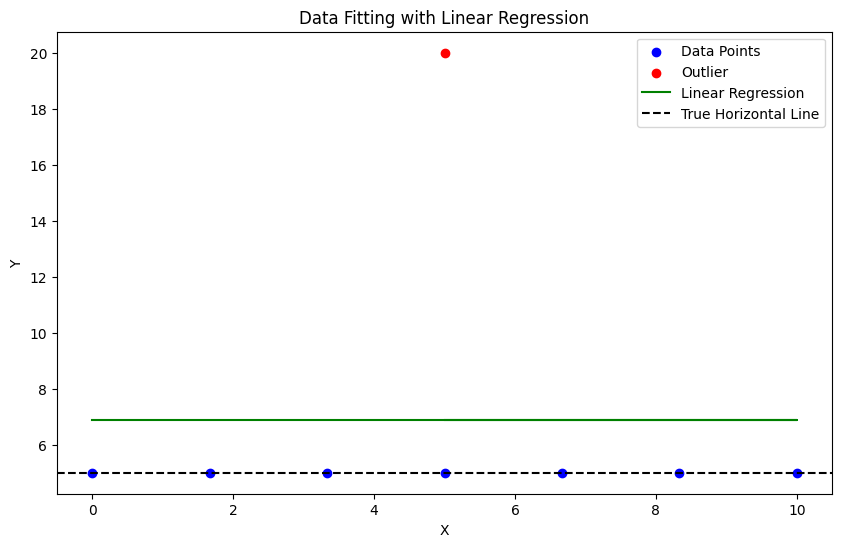

In [4]:
# 线性回归
lin_reg = LinearRegression()
lin_reg.fit(x_combined.reshape(-1, 1), y_combined)
y_pred_lin = lin_reg.predict(x_combined.reshape(-1, 1))

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.scatter(5 , 20 , color='red', label='Outlier')  # 假设孤立点也在直线上
plt.plot(x_combined, y_pred_lin, color='green', label='Linear Regression')
plt.axhline(y=5, color='black', linestyle='--', label='True Horizontal Line')
plt.legend()
plt.title('Data Fitting with Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('HW1_1_1.pdf', dpi=300, bbox_inches='tight')
plt.show()

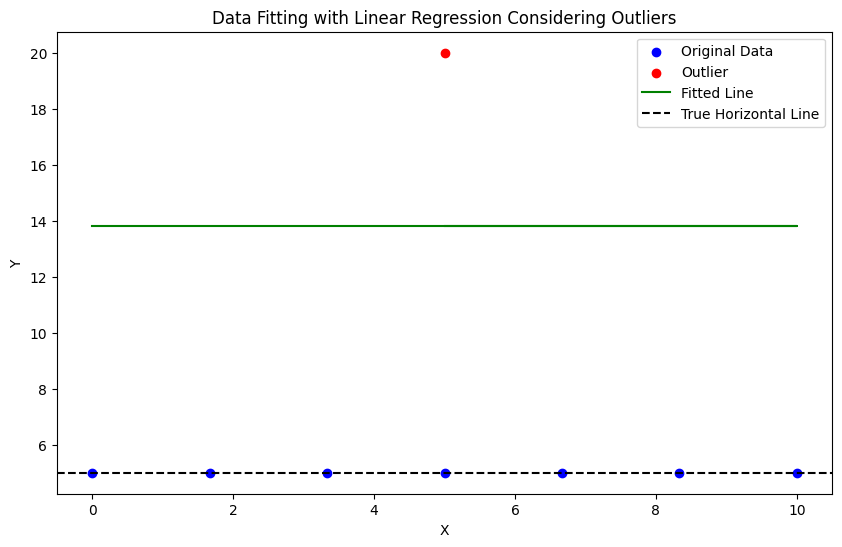

In [5]:
# 创建权重数组，为孤立点设置更高的权重
weights = np.ones(len(x_combined))  # 默认权重为1
weights[-1] = 10  # 为孤立点设置更高的权重

lin_reg = LinearRegression()
lin_reg.fit(x_combined.reshape(-1, 1), y_combined, sample_weight=weights)
y_pred = lin_reg.predict(x_combined.reshape(-1, 1))

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.scatter(outlier[0], outlier[1], color='red', label='Outlier', zorder=5)
plt.plot(x_combined, y_pred, color='green', label='Fitted Line')
plt.axhline(y=5, color='black', linestyle='--', label='True Horizontal Line')
plt.legend()
plt.title('Data Fitting with Linear Regression Considering Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('HW1_1_2.pdf', dpi=300, bbox_inches='tight')
plt.show()

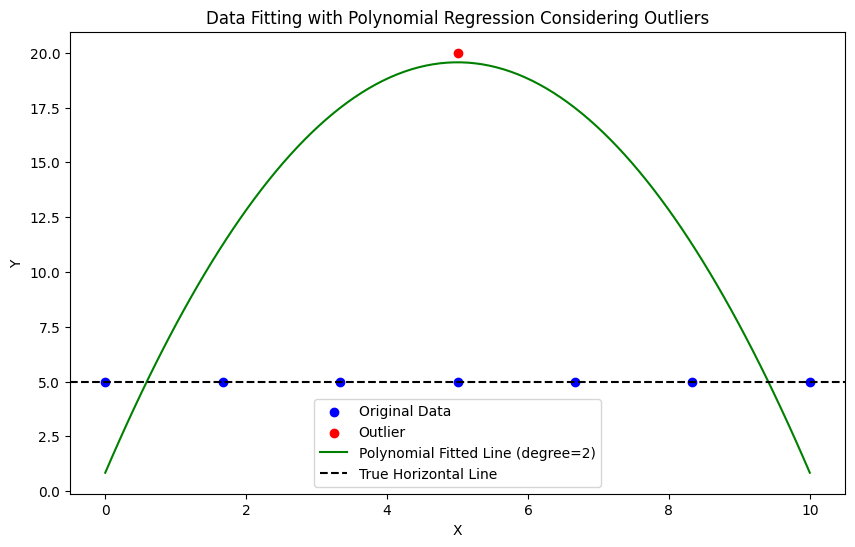

In [6]:
# 使用多项式拟合（degree为1表示线性拟合，可以调高degree进行高阶多项式拟合）
degree = 2  # 选择多项式的阶次
coefficients = np.polyfit(x_combined, y_combined, degree, w=weights)

# 生成拟合曲线
x_fit = np.linspace(min(x_combined), max(x_combined), 100)
y_fit = np.polyval(coefficients, x_fit)

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.scatter(outlier[0], outlier[1], color='red', label='Outlier', zorder=5)
plt.plot(x_fit, y_fit, color='green', label=f'Polynomial Fitted Line (degree={degree})')
plt.axhline(y=5, color='black', linestyle='--', label='True Horizontal Line')
plt.legend()
plt.title('Data Fitting with Polynomial Regression Considering Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('HW1_1_3.pdf', dpi=300, bbox_inches='tight')
plt.show()

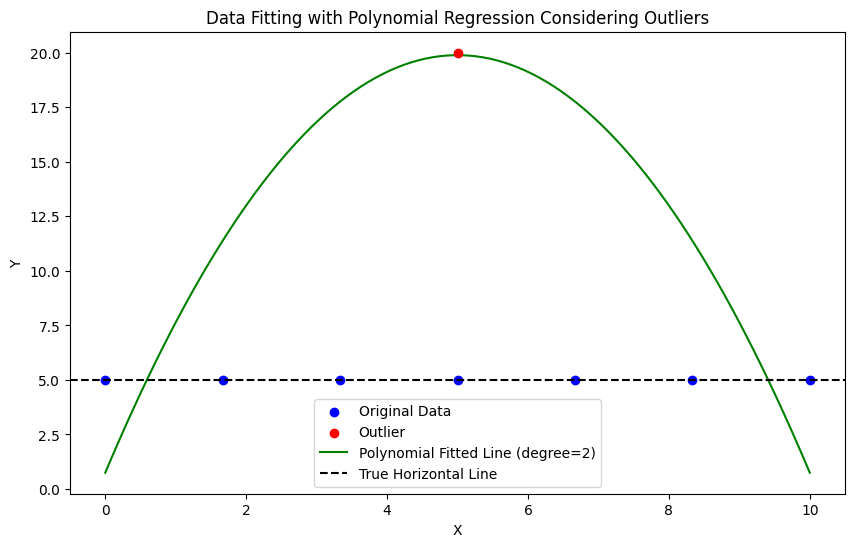

In [7]:
# 创建权重数组，为孤立点设置更高的权重
weights = np.ones(len(x_combined))  # 默认权重为1
weights[-1] = 20  # 为孤立点设置更高的权重

# 使用多项式拟合（degree为1表示线性拟合，可以调高degree进行高阶多项式拟合）
degree = 2  # 选择多项式的阶次
coefficients = np.polyfit(x_combined, y_combined, degree, w=weights)

# 生成拟合曲线
x_fit = np.linspace(min(x_combined), max(x_combined), 100)
y_fit = np.polyval(coefficients, x_fit)

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.scatter(outlier[0], outlier[1], color='red', label='Outlier', zorder=5)
plt.plot(x_fit, y_fit, color='green', label=f'Polynomial Fitted Line (degree={degree})')
plt.axhline(y=5, color='black', linestyle='--', label='True Horizontal Line')
plt.legend()
plt.title('Data Fitting with Polynomial Regression Considering Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('HW1_1_4.pdf', dpi=300, bbox_inches='tight')
plt.show()

问题2：绘制四个图形

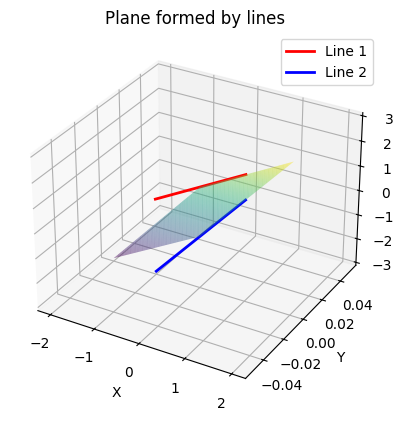

In [9]:
# 连接两条直线
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义两条不共面的直线
# 直线1的参数方程：x = t, y = 0, z = 1 + t
# 直线2的参数方程：x = 0, y = s, z = s - 1
t = np.linspace(-1, 1, 100)
s = np.linspace(-1, 1, 100)

# 两条直线上的点
x1 = t
y1 = np.zeros_like(t)
z1 = 1 + t

x2 = s
y2 = np.zeros_like(s)
z2 = 2 * s - 1

# 将两条直线上的每一对点连线，形成一个平面
X = np.outer(x1, np.ones_like(s)) + np.outer(np.ones_like(t), x2)
Y = np.outer(y1, np.ones_like(s)) + np.outer(np.ones_like(t), y2)
Z = np.outer(z1, np.ones_like(s)) + np.outer(np.ones_like(t), z2)

# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制由直线点连线形成的平面
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

# 绘制两条直线
ax.plot(x1, y1, z1, color='r', label='Line 1', lw=2)
ax.plot(x2, y2, z2, color='b', label='Line 2', lw=2)

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plane formed by lines')

# 显示图例
ax.legend()
plt.savefig('HW1_2_1.pdf', dpi=300, bbox_inches='tight')
# 显示图形
plt.show()


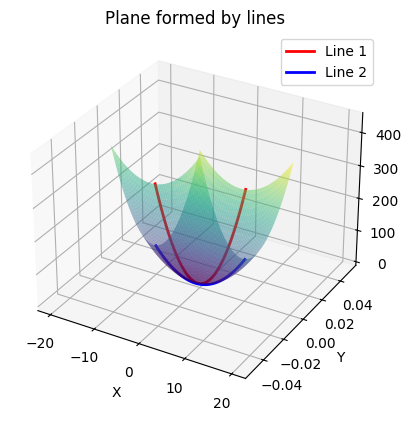

In [10]:
# 连接两条曲线
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义两条不共面的直线
# 直线1的参数方程：x = t, y = 0, z = 1 + t
# 直线2的参数方程：x = 0, y = s, z = s - 1
t = np.linspace(-10, 10, 100)
s = np.linspace(-10, 10, 100)

# 两条直线上的点
x1 = t
y1 = np.zeros_like(t)
z1 = 1 + 3*t + 3*t*t

x2 = s
y2 = np.zeros_like(s)
z2 = s*s + 2 * s - 1

# 将两条直线上的每一对点连线，形成一个平面
X = np.outer(x1, np.ones_like(s)) + np.outer(np.ones_like(t), x2)
Y = np.outer(y1, np.ones_like(s)) + np.outer(np.ones_like(t), y2)
Z = np.outer(z1, np.ones_like(s)) + np.outer(np.ones_like(t), z2)

# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制由直线点连线形成的平面
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

# 绘制两条直线
ax.plot(x1, y1, z1, color='r', label='Line 1', lw=2)
ax.plot(x2, y2, z2, color='b', label='Line 2', lw=2)

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plane formed by lines')

# 显示图例
ax.legend()

# 显示图形
plt.savefig('HW1_2_2.pdf', dpi=300, bbox_inches='tight')
plt.show()

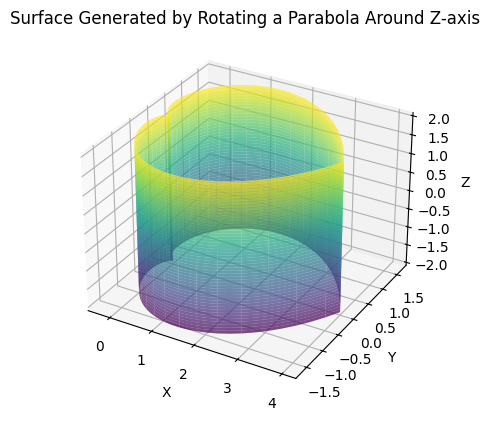

In [11]:
# 绘制曲线绕圆周旋转形成曲面
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义参数
theta = np.linspace(0, 2 * np.pi, 100)  # 角度参数，用于绕圆周旋转
z = np.linspace(-2, 2, 100)  # z 方向的高度，定义曲线的范围

# 定义曲线方程，假设是一个抛物线 y = z^2
r = z**2  # 半径为 z^2 的抛物线

# 生成旋转曲面
theta, Z = np.meshgrid(theta, z)  # 创建 2D 网格
X = r * np.cos(theta)  # X = r * cos(theta)
Y = r * np.sin(theta)  # Y = r * sin(theta)

# 创建 3D 图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制旋转曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Generated by Rotating a Parabola Around Z-axis')

# 显示图形
plt.savefig('HW1_2_3.pdf', dpi=300, bbox_inches='tight')
plt.show()


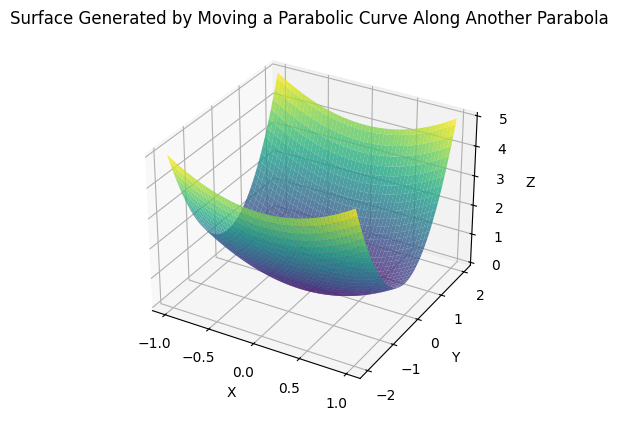

In [12]:
# 曲线沿着另一条曲线移动形成曲面
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义参数 t 作为路径参数
t = np.linspace(-2, 2, 100)

# 生成路径曲线（沿 y 轴的二次曲线）
y_path = t  # 沿 y 轴移动
z_path = t**2  # 路径曲线是 z = t^2

# 定义生成曲线（在 xz 平面上的二次曲线，类似抛物线）
x_curve = np.linspace(-1, 1, 50)  # 生成曲线在 x 方向的范围
z_curve = x_curve**2  # 生成曲线的形状，z = x^2

# 创建网格，用于生成 3D 曲面
Y, X = np.meshgrid(y_path, x_curve)  # 沿路径方向移动
Z_curve = np.tile(z_curve, (len(t), 1)).T  # 生成曲线的 z 坐标重复到每个路径点
Z = Z_curve + z_path  # 将生成曲线沿路径曲线移动

# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Generated by Moving a Parabolic Curve Along Another Parabola')

# 显示图形
plt.savefig('HW1_2_4.pdf', dpi=300, bbox_inches='tight')
plt.show()
